In [9]:
##  https://www.linkedin.com/pulse/study-lstm-time-serial-prediction-shenwei-wang/

from mod1 import *
import lstm, time

In [10]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [11]:
X_train.shape

(3709, 50, 1)

In [12]:
y_train.shape

(3709,)

In [13]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(units=18, return_sequences=True,activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM( units=4, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense( units=1))
#model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='adam')
print ('compilation time : ', time.time() - start)

compilation time :  0.002989053726196289


In [14]:
#Step 3 Train the model
model.fit( X_train,y_train, batch_size=512, epochs=5, validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/5


INFO:plaidml:Analyzing Ops: 5363 of 9823 operations complete


3072/3523 [=========================>....] - ETA: 3s - loss: 0.0040

INFO:plaidml:Analyzing Ops: 2490 of 9823 operations complete
INFO:plaidml:Analyzing Ops: 8313 of 9823 operations complete


3523/3523 [==============================] - 54s 15ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 2/5
3523/3523 [==============================] - 1s 257us/step - loss: 0.0029 - val_loss: 0.0019
Epoch 3/5
3523/3523 [==============================] - 1s 245us/step - loss: 0.0020 - val_loss: 9.9094e-04
Epoch 4/5
3523/3523 [==============================] - 1s 245us/step - loss: 0.0014 - val_loss: 6.7589e-04
Epoch 5/5
3523/3523 [==============================] - 1s 236us/step - loss: 0.0012 - val_loss: 6.5947e-04


INFO:plaidml:Analyzing Ops: 3344 of 4198 operations complete


50 0
100 0
100 1
150 1
150 2
200 2
200 3
250 3
250 4
300 4
300 5
350 5
350 6
400 6
400 7
450 7


<Figure size 432x288 with 0 Axes>

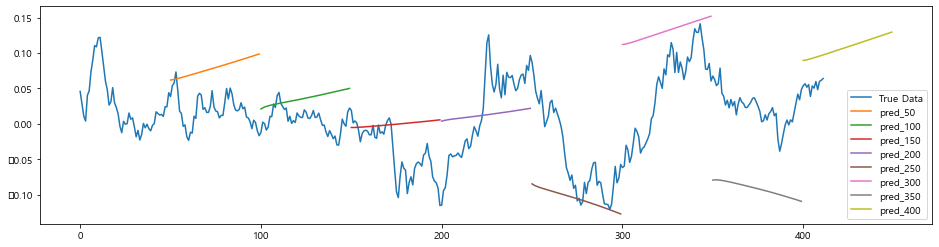

In [15]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
#predicted_stock_price = regressor.predict(inputs)
lstm.plot_results_multiple_shift(predictions, y_test, 50)